# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset into a dataframe
df = pd.read_csv(r"C:\Users\user\Downloads\waze_dataset.csv")

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







#### **Data overview and summary statistics**


In [8]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [9]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [11]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

In [16]:
def quick_boxplot(x, **kwargs):
    '''
    Parameters: Data-->(DataFrame, Series, dict, array)
               and any other sns.boxplot() parameter
               Except: width (defined as 0.5 for appropriate label positioning)
    Returns a quick Boxplot using Seaborn (sns) and matplotlib.pyplot (plt).
    Adds vertical dotted line and text label for Q1, Q3, Median,
    and text labels for whiskers
    
    '''
    # Create a boxplot
    sns.boxplot(x, width=0.5, orient='h', **kwargs)
    
    ### Rest of code is just for creating dotted lines and text labels ###
    
    # Calculate whisker length in boxplot
    whis = (
           (x.quantile(q=0.75)) - (x.quantile(q=0.25))
           ) * 1.5


    # Plot the dotted line and text for median
    plt.axvline(x.median(), color='white', linestyle='--')
    plt.annotate(round(x.median(), 1),(x.median(),0), ha='center', color='white')

    #Plot the dotted line and text for begining of the Q2 (Start of IQR Range)
    plt.axvline(x.quantile(q=0.25), color='green', linestyle='--')
    plt.annotate(round(x.quantile(q=0.25)),(x.quantile(q=0.25),-0.27), ha='right', color='green')

    #Plot dotted line and text for begining of the Q3 (End of IQR Range)
    plt.axvline(x.quantile(q=0.75), color='red', linestyle='--')
    plt.annotate(round(x.quantile(q=0.75)),(x.quantile(q=0.75),-0.27), ha='left', color='red')

    # Plot the text for the right whisker
      # But first check if the whisker is gonna be plotted at 1.5x IQR or
      # at the maximum value
    if x.quantile(q=0.75)+ whis > x.max():
        plt.annotate(round(x.max(), 1),
                    (x.max(),0.17),
                     ha='center',
                     color='black'
                     )
    else:
        plt.annotate(round(x.quantile(q=0.75)+ whis, 1),
                 ((x.quantile(q=0.75))+ whis,0.17),
                 ha='center',
                 color='black'
                 )

    # Plot the text for the left whisker
    # Check if left whisker is plotted by --> 1.5x the IQR(q3-q1), which would be the whis variable,
      # or is simply just marked at the Minimum value of the dataset
    if x.quantile(q=0.25)- whis < 0:
    
        plt.annotate(round(x.min(), 1),
                    (x.min(),0.17),
                     ha='center',
                     color='black'
                     )   
    else:
        plt.annotate(round(x.quantile(q=0.25)- whis, 1),
                    ((x.quantile(q=0.25))- whis,0.17),
                     ha='center',
                     color='black'
                    )
    
    return plt.show()

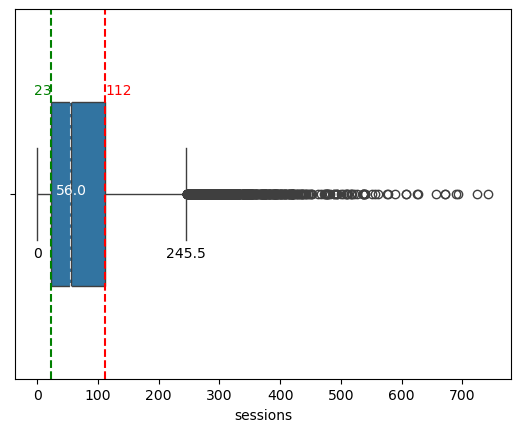

In [17]:
# Box plot
quick_boxplot(x=df['sessions'])

In [18]:
# Histogram
    
def quick_hist(x, **kwargs):
        
    '''
    creates quick histogram using Seaborn,
    plots 2 dotted line (mean and median),
    plots text outside of graph showing mean & median values
    
    '''
    #Create a histogram
    sns.histplot(x, **kwargs)
    
    #Plot dotted vertial axis lines
    plt.axvline(x.median(), color='blue', linestyle='--')
    plt.axvline(x.mean(), color='black', linestyle='--')

    #Plot text showing mean and median values outside of graph
    plt.annotate(f'Median = {round(x.median(), 1)}',
                (1.05,0.8),
                xycoords='axes fraction',
                ha='left',
                color='blue')
    
    plt.annotate(f'Mean = {round(x.mean(), 1)}',
                (1.05,0.9),
                xycoords='axes fraction',
                ha='left',
                color='black')


    plt.show()

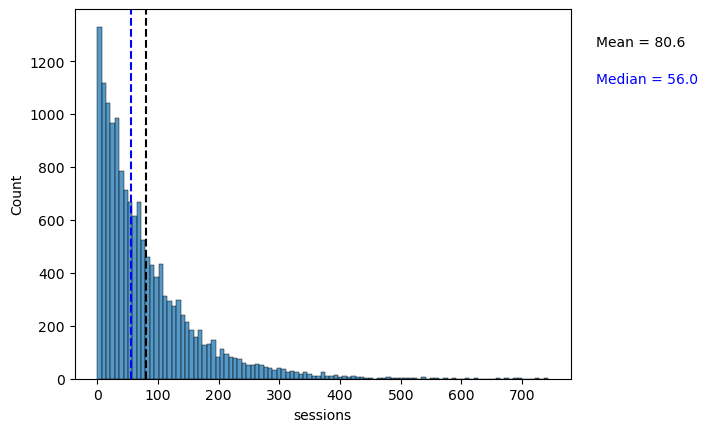

In [19]:
quick_hist(df['sessions'])

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

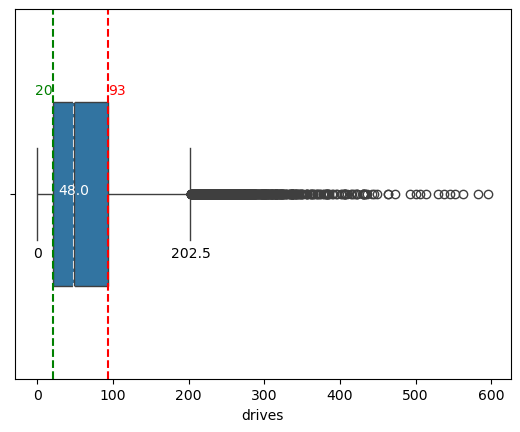

In [22]:
# Box plot
quick_boxplot(df['drives'])

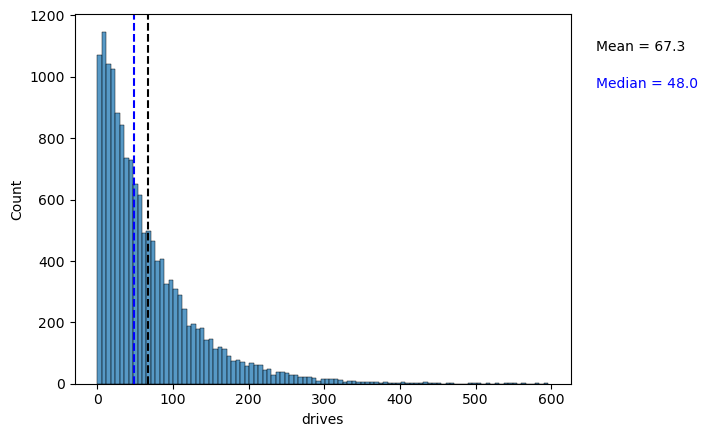

In [23]:
# Histogram
quick_hist(df['drives'])

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

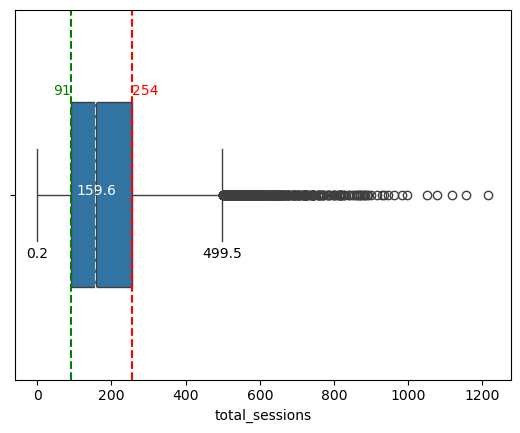

In [26]:
# Box plot
quick_boxplot(df['total_sessions'])

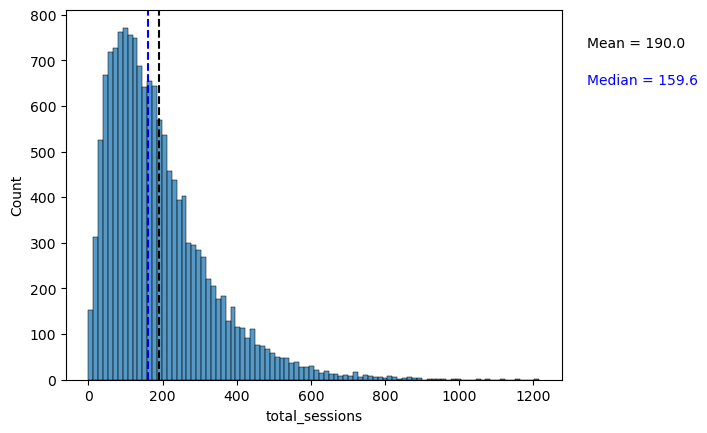

In [27]:
# Histogram
quick_hist(df['total_sessions'])

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

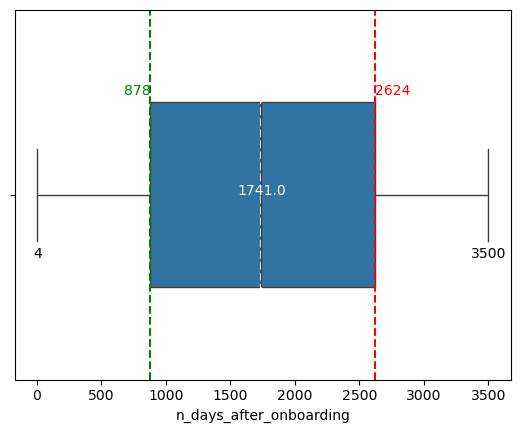

In [30]:
# Box plot
quick_boxplot(df['n_days_after_onboarding'])

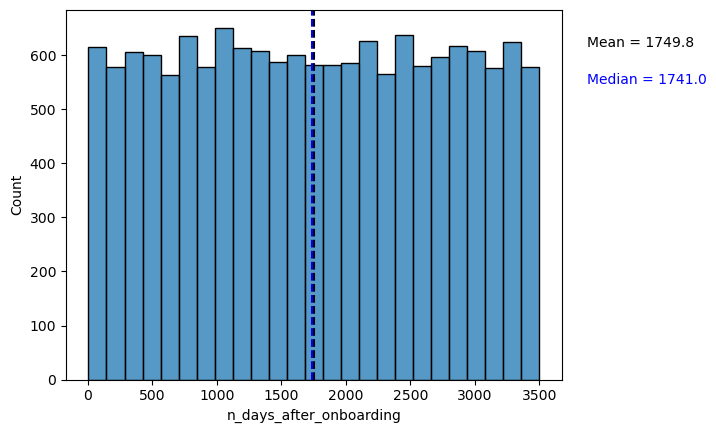

In [31]:
# Histogram
quick_hist(df['n_days_after_onboarding'])

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

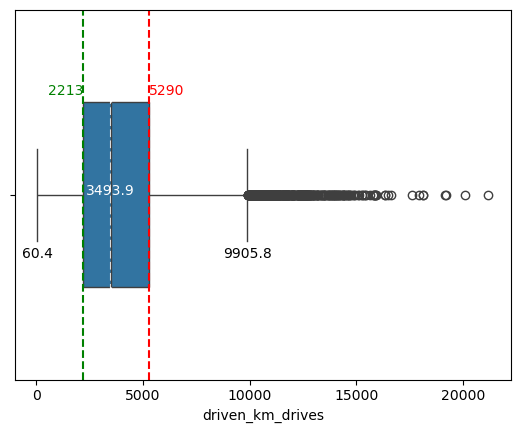

In [34]:
# Box plot
quick_boxplot(df['driven_km_drives'])

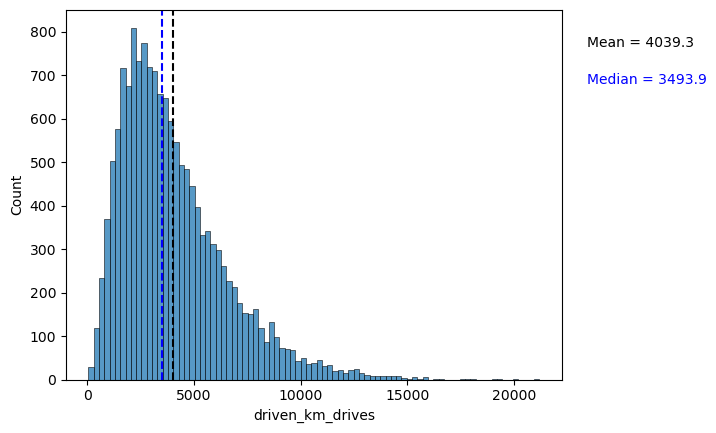

In [35]:
# Histogram
quick_hist(df['driven_km_drives'])

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. The users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

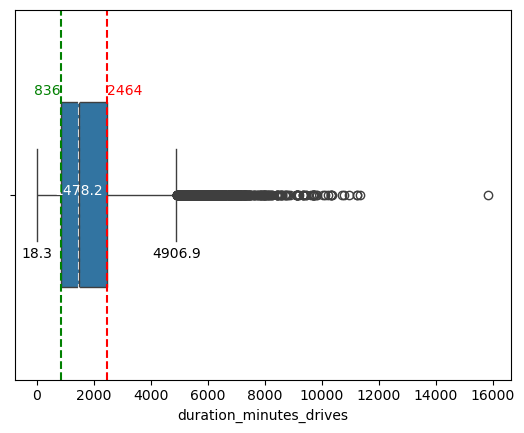

In [38]:
# Box plot
quick_boxplot(df['duration_minutes_drives'])

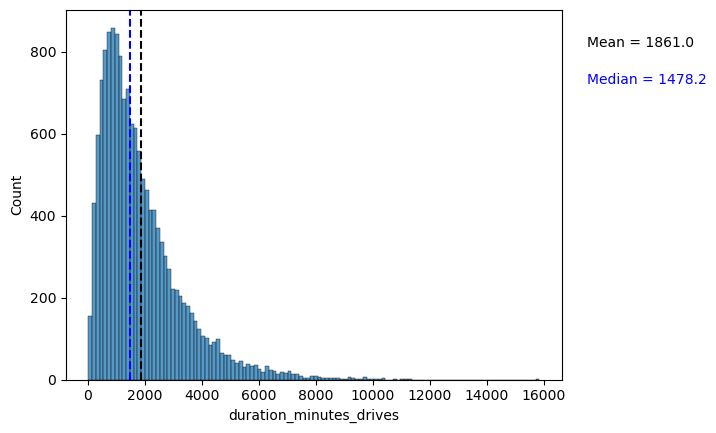

In [39]:
# Histogram
quick_hist(df['duration_minutes_drives'])

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

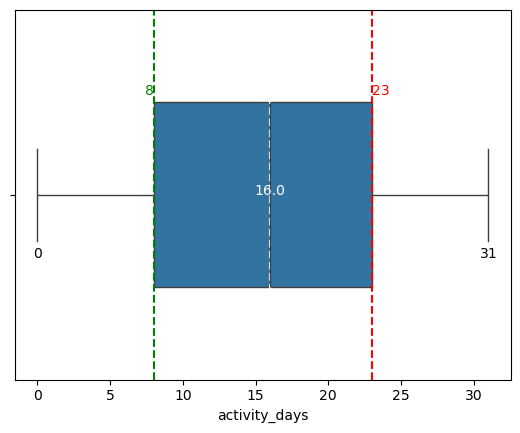

In [42]:
# Box plot
quick_boxplot(df['activity_days'])

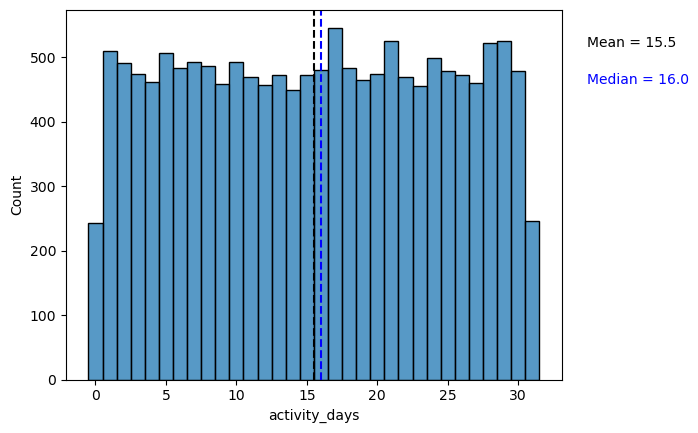

In [43]:
# Histogram
quick_hist(df['activity_days'], discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

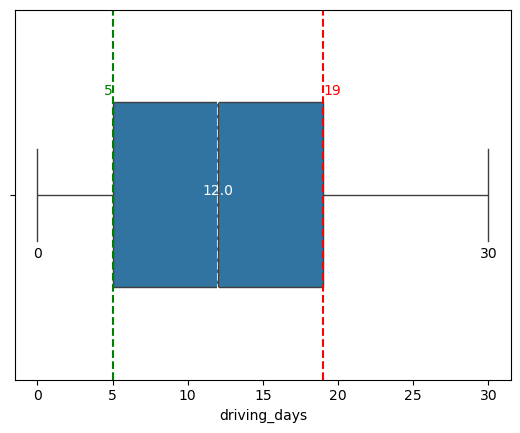

In [46]:
# Box plot
quick_boxplot(df['driving_days'])

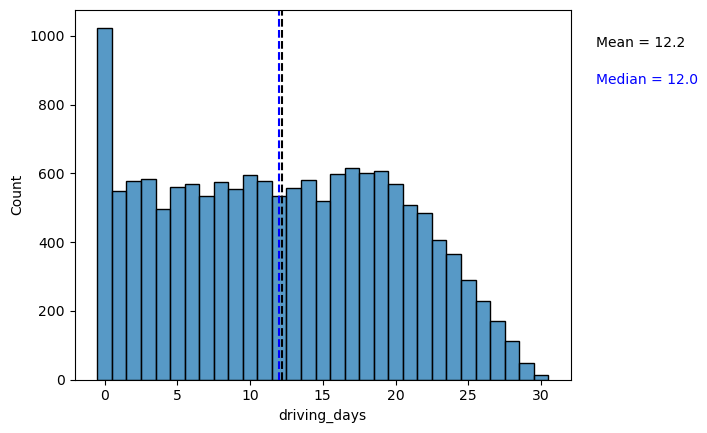

In [47]:
# Histogram
quick_hist(df['driving_days'], discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

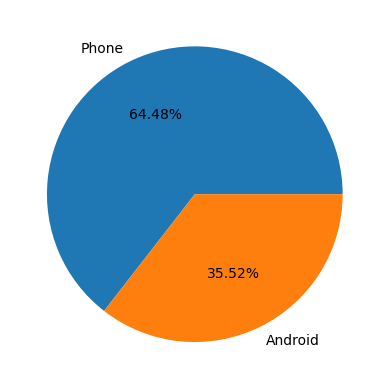

In [50]:
# Pie chart
plt.pie(x=df['device'].value_counts(), labels=['Phone', 'Android'], autopct='%.2f%%' )
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

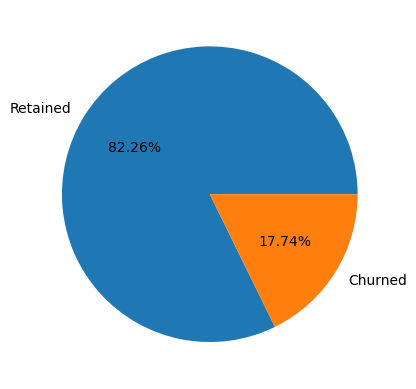

In [53]:
# Pie chart
plt.pie(x=df['label'].value_counts(), labels=['Retained','Churned'], autopct='%.2f%%' )
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

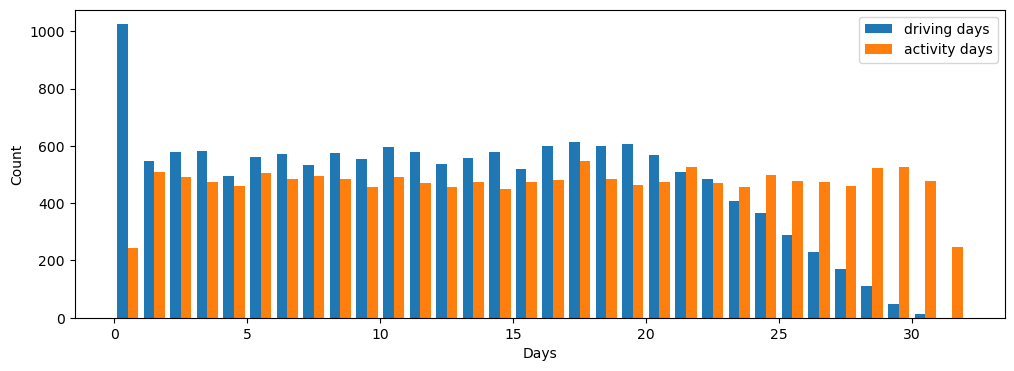

In [56]:
# Histogram
plt.figure(figsize=(12,4))
plt.hist(x=[df['driving_days'], df['activity_days']], bins=range(0,33,1), label=['driving days', 'activity days'])
plt.legend()
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [58]:
print(df['driving_days'].max(), df['activity_days'].max())

30 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

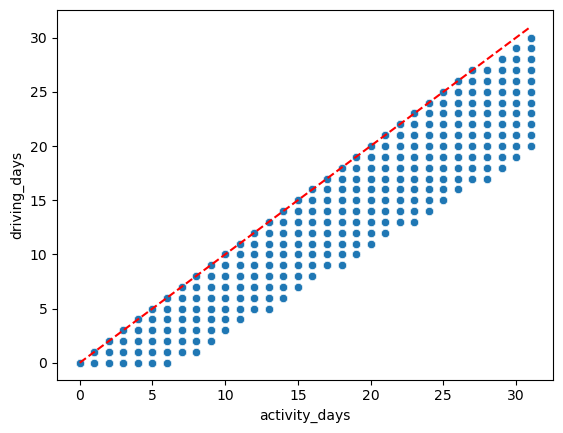

In [60]:
# Scatter plot
sns.scatterplot(data=df, x='activity_days', y='driving_days')
plt.plot([0,31], [0,31], color='red', linestyle='--')

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

<Axes: xlabel='device', ylabel='Count'>

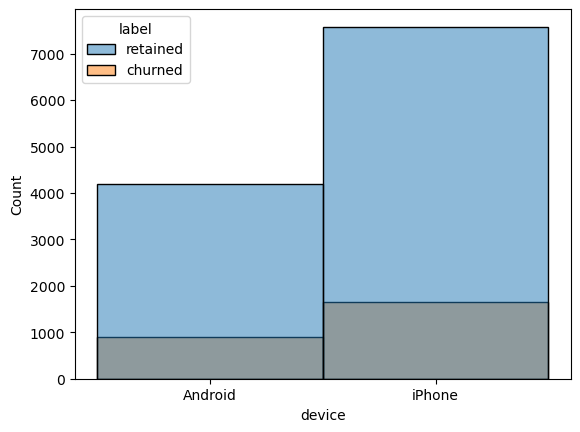

In [63]:
# Histogram
sns.histplot(data=df, x='device', hue='label')

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [66]:
# 1. Create `km_per_driving_day` column

df.insert(9, 'km_per_driving_day', df['driven_km_drives'] / df['driving_days'])


In [67]:
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [69]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

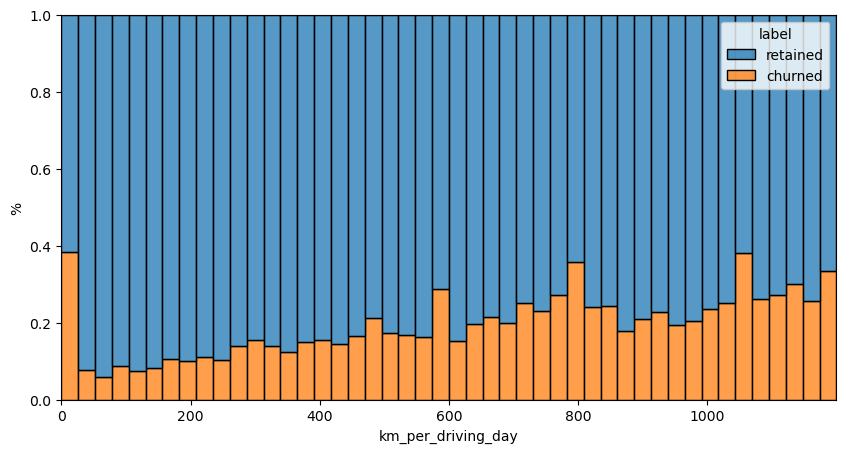

In [71]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(
            x=df.km_per_driving_day[df['km_per_driving_day'] < 1200],
            hue=df['label'],
            multiple='fill'
            )
plt.ylabel('%')
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

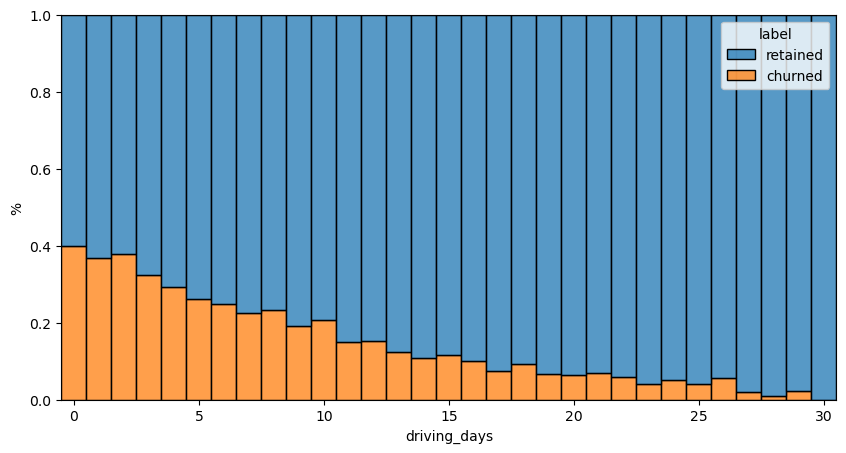

In [74]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(
            x=df['driving_days'],
            hue=df['label'],
            discrete=True,
            multiple='fill'
            )
plt.ylabel('%')
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [77]:
df.insert(5,'percent_sessions_in_last_month', df.sessions / df.total_sessions)

What is the median value of the new column?

In [79]:
f'{df.percent_sessions_in_last_month.median():.2%}'

'42.31%'

Now, create a histogram depicting the distribution of values in this new column.

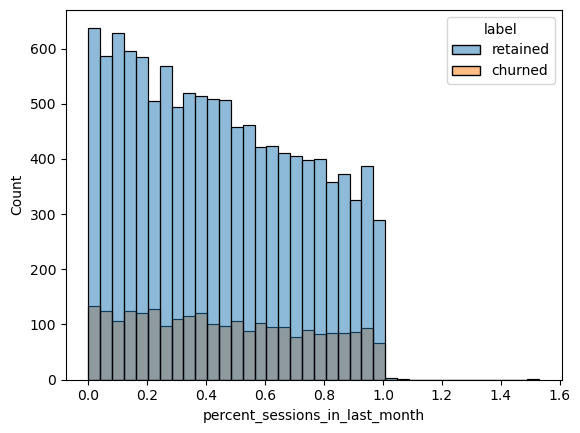

In [81]:
# Histogram
sns.histplot(x=df.percent_sessions_in_last_month,
            hue=df.label,
            )
plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [83]:
df.n_days_after_onboarding.median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

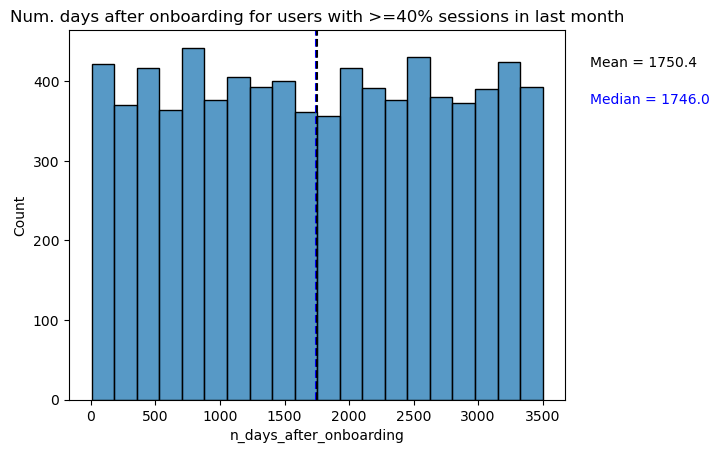

In [85]:
# Histogram
plt.title('Num. days after onboarding for users with >=40% sessions in last month')

quick_hist(x=df.n_days_after_onboarding[df.percent_sessions_in_last_month >= 0.4])



The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [166]:
def impute_outlier(dataframe_name, columns, percentile):
    '''
    Parameters: dataframe_name = Name of the dataframe to perform function on 
                columns = names of columns to perform function on (list)
                percentile = percentile (int)
    imputes all values above x percentile with the value at x percentile for each column
    
    '''
    if type(columns) == list:
    
        for column in columns:
            percentile_value = dataframe_name[column].quantile(percentile)
            dataframe_name.loc[dataframe_name[column] > percentile_value, column] = percentile_value
        
        print(f"Values in Columns:{columns} \nabove {percentile*100:.0f}th percentile have been imputed with the value at {percentile*100:.0f}th percentile.")
        
    else:
        raise TypeError('The column(s) must be a list')
        

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [170]:
# Test to see if the TypeError shows properly

impute_outlier(df, columns = 'sessions', percentile=0.95)

TypeError: The column(s) must be a list

In [162]:
impute_outlier(df, percentile=0.95, columns = ['sessions',
                                                 'drives',
                                                 'total_sessions',
                                                 'driven_km_drives',
                                                 'duration_minutes_drives'])

Values in Columns:['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives'] 
above 95th percentile have been imputed with the value at 95th percentile.


Call `describe()` to see if your change worked.

In [93]:
df.describe() 

,ID,sessions,drives,total_sessions,percent_sessions_in_last_month,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,km_per_driving_day,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,0.449255,1749.837789,121.605974,29.672512,3939.632764,578.963113,1789.647426,15.537102,12.179879
std,4329.982679,67.297958,55.306924,118.600463,0.286919,1008.513876,148.121544,45.394651,2216.041510,1030.094384,1222.705167,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,0.000000,4.000000,0.000000,0.000000,60.441250,0.000000,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,0.196221,878.000000,9.000000,0.000000,2212.600607,136.238895,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,0.423097,1741.000000,71.000000,9.000000,3493.858085,272.889272,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,0.687216,2623.500000,178.000000,43.000000,5289.861262,558.686918,2464.362632,23.000000,19.000000
max,14998.000000,243.000000,201.000000,454.363204,1.530637,3500.000000,1236.000000,415.000000,8889.794236,15420.234110,4668.899349,31.000000,30.000000


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### Conclusion

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Was there anything that led you to believe the data was erroneous or problematic in any way?
- Unlikely or even impossible values for driven_km_drives column (Max: 15,420km driven/day, seems physically impossible)

- Monthly variables like activity_days and driving_days,because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

2. What factors correlated with user churn? How?
- Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn.
- Number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

